# Notebook 5: Integrated Case Study - Atmospheric Structure, Stability & Aerosols
### Assignment 1 - Atmospheric Dynamics & Aerosol Science

**Course:** RSG-5013 Aerosol Remote Sensing and Atmospheric Dynamics  
**Instructor:** Dr. Arjun Adhikari  
**Student Name:** ___Shaitali Parwar_________________  
**PR No.:** ______202200776______________  

---

## Learning Objectives

In this integrated case study, you will:
- Combine concepts from dynamics, thermodynamics, and aerosols  
- Analyse a synthetic atmospheric sounding and diagnose stability  
- Compute potential temperature and classify boundary-layer type  
- Compare aerosol loading (AOD) under different stability regimes  
- Interpret the combined effects for air quality and satellite retrievals

---
## Instructions
1. Run all code cells from top to bottom.  
2. Answer all written questions in the Markdown cells provided.  
3. Do not delete existing cells; you may add new cells if needed.  
4. Save your work and push to GitHub when finished.


In [1]:
# Imports and basic constants
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81
Rd = 287.0
cpd = 1004.0
p0 = 1000.0

print("Libraries and constants loaded.")


Libraries and constants loaded.


## Q1. Synthetic Atmospheric Sounding

You are given a simplified atmospheric morning profile over a coastal urban region.

- Pressure levels (hPa)  
- Temperature profile (K)  

### Tasks
1. Plot temperature vs pressure.  
2. Comment on whether the lower atmosphere appears relatively stable, neutral, or unstable.


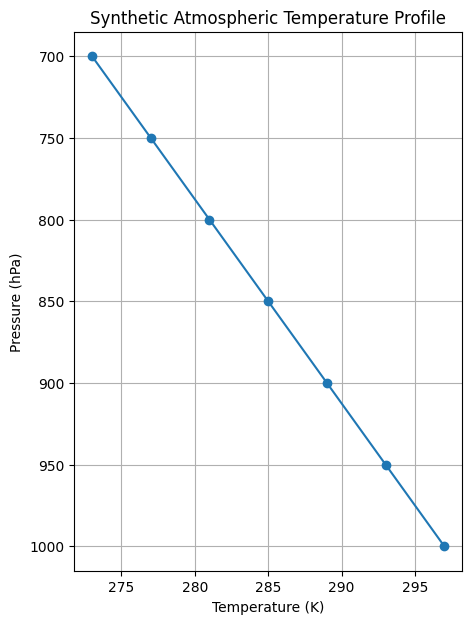

In [2]:
# Synthetic atmospheric profile
pressure = np.array([1000, 950, 900, 850, 800, 750, 700])  # hPa
temperature = np.array([297, 293, 289, 285, 281, 277, 273])  # K

plt.figure(figsize=(5, 7))
plt.plot(temperature, pressure, marker='o')
plt.gca().invert_yaxis()
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (hPa)")
plt.title("Synthetic Atmospheric Temperature Profile")
plt.grid(True)
plt.show()


### Q1(b). Interpretation

In 4-6 sentences, answer:
1. Is temperature decreasing rapidly or slowly with height?  
2. Does the lowest kilometre look closer to stable or unstable conditions?  
3. How would such a structure generally influence morning aerosol concentration near the surface?

Write your answer below.
1. Temperature Change with HeightThe temperature is decreasing rapidly with height. It drops from approximately 297 K at $1000$ hPa to 273 K at $700$ hPa. This indicates a significant cooling rate as you move up through the atmospheric column.
2. Stability of the Lowest KilometreThe lowest kilometre (from $1000$ hPa to roughly $900$ hPa) looks closer to unstable conditions. In this layer, the temperature drops from 297 K to 289 K over a relatively small pressure change, suggesting a steep lapse rate that would allow for buoyant air parcels to rise.
3. Influence on Morning Aerosol ConcentrationThis type of structure generally leads to lower morning aerosol concentrations near the surface.Because the atmosphere is not "capped" by a stable inversion layer, the vertical instability allows for stronger mixing.Surface-level emissions (like those from morning traffic) are efficiently transported upward and diluted throughout a deeper boundary layer rather than being trapped at breathing level.

## Q2. Potential Temperature and Stability

Use the dry potential temperature definition:

$$\theta = T \left(\frac{p_0}{p}\right)^{R_d / c_{pd}}.$$

### Tasks
1. Compute potential temperature at each level.  
2. Plot $\theta$ vs pressure.  
3. Use the $\theta$ profile to comment on static stability.


p = 1000 hPa, T =  297.0 K, theta =  297.0 K
p =  950 hPa, T =  293.0 K, theta =  297.3 K
p =  900 hPa, T =  289.0 K, theta =  297.8 K
p =  850 hPa, T =  285.0 K, theta =  298.6 K
p =  800 hPa, T =  281.0 K, theta =  299.5 K
p =  750 hPa, T =  277.0 K, theta =  300.7 K
p =  700 hPa, T =  273.0 K, theta =  302.3 K


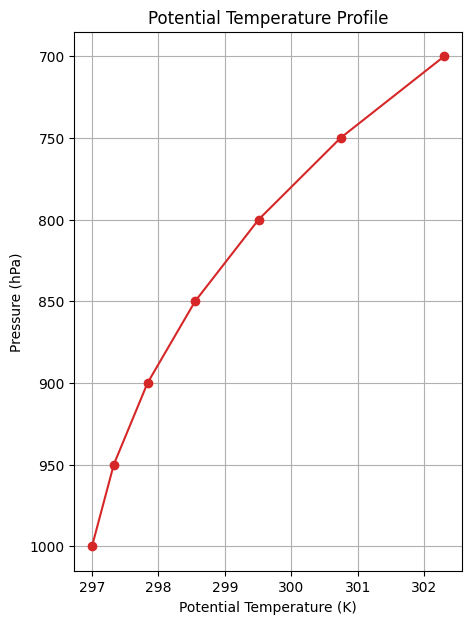

In [3]:
def potential_temperature(T, p_hPa):
    """Compute dry potential temperature [K] from T [K] and p [hPa]."""
    return T * (p0 / p_hPa) ** (Rd / cpd)

theta = potential_temperature(temperature, pressure)

for p, T, th in zip(pressure, temperature, theta):
    print(f"p = {p:4.0f} hPa, T = {T:6.1f} K, theta = {th:6.1f} K")

plt.figure(figsize=(5, 7))
plt.plot(theta, pressure, marker='o', color='tab:red')
plt.gca().invert_yaxis()
plt.xlabel("Potential Temperature (K)")
plt.ylabel("Pressure (hPa)")
plt.title("Potential Temperature Profile")
plt.grid(True)
plt.show()


### Q2(b). Interpretation

1. Does potential temperature increase, decrease, or stay nearly constant with height?  
2. What does this imply about static stability?  
3. In 3-4 sentences, describe how this stability influences vertical mixing of aerosols.

Write your answer below.
1. Decrease
2. When potential temperature ($\theta$) decreases with height, it implies that the atmosphere is absolutely unstable.
3. When potential temperature decreases with height, the resulting absolute instability acts as a powerful engine for vertical mixing. Buoyant air parcels rise rapidly from the surface, efficiently transporting aerosols and pollutants high into the free troposphere. This vertical "ventilation" prevents pollutants from concentrating at breathing level, leading to lower surface-level concentrations even when emission rates are high.

## Q3. Simple AOD Variation Through the Day

Assume AOD at 550 nm behaves as follows over one day:
- Morning (stable boundary layer): AOD = 0.42  
- Afternoon (deep convective boundary layer): AOD = 0.28  
- Evening (re-stabilisation): AOD = 0.35  

### Tasks
1. Plot AOD vs time of day (categorical: morning, afternoon, evening).  
2. Comment on why AOD is highest in the morning and lowest in the afternoon.


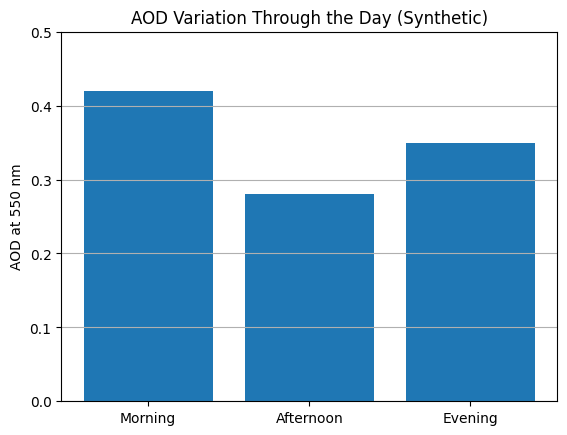

Minimum AOD: 0.28
Maximum AOD: 0.42


In [4]:
time_labels = ["Morning", "Afternoon", "Evening"]
AOD = np.array([0.42, 0.28, 0.35])

plt.figure()
plt.bar(time_labels, AOD)
plt.ylabel("AOD at 550 nm")
plt.title("AOD Variation Through the Day (Synthetic)")
plt.ylim(0, 0.5)
plt.grid(True, axis='y')
plt.show()

print("Minimum AOD:", np.min(AOD))
print("Maximum AOD:", np.max(AOD))


### Q3(b). Interpretation

In 4–6 sentences, discuss:
1. Why morning AOD is often highest in urban/coastal environments.  
2. How growth of the convective boundary layer can reduce column AOD in the afternoon.  
3. Why AOD may increase again in the evening.

Write your answer below.
1. High Morning AOD (0.42)
In urban and coastal environments, morning AOD is frequently the highest due to a combination of high emissions and a stable boundary layer.

Emissions: Surface activities such as morning traffic, industrial startups, and coastal domestic activities release a peak volume of aerosols into the atmosphere.

Stability: Overnight surface cooling creates a shallow, stable layer (nocturnal boundary layer) that acts as a "lid," trapping these new emissions near the ground rather than allowing them to mix vertically.

Hygroscopic Growth: In coastal areas, high morning relative humidity can cause aerosols to swell by absorbing water, increasing their scattering efficiency and total AOD before the sun dries the air.

2. Afternoon Reduction (0.28)
The transition to a deep convective boundary layer facilitates the ventilation of the air column.

Vertical Mixing: Solar heating destabilizes the atmosphere, as seen in the provided temperature profile where temperature decreases rapidly with height. This promotes vigorous vertical mixing that lofts aerosols high into the free troposphere.

Dilution and Export: Once aerosols are lifted out of the shallow surface layer, they are distributed through a much larger volume of air. Furthermore, stronger horizontal winds at higher altitudes can more effectively export these particles out of the local region, reducing the total integrated column AOD.

3. Evening AOD Increase (0.35)
As the sun sets, the atmosphere begins to re-stabilize, leading to a moderate rebound in AOD.

Boundary Layer Collapse: The loss of solar heating cause the convective boundary layer to collapse, forming a new, shallower stable layer near the surface.

Evening Peak: Similar to the morning, the evening rush hour and cooking activities provide a fresh influx of aerosols. Because the vertical "engine" of convection has shut down, these particles are again trapped in a smaller volume of air, increasing the optical depth.

## Q4. Approximate Near-Surface Temperature Gradient

Use the lowest two levels (1000 and 950 hPa) as a proxy for near-surface temperature gradient.

Assume an approximate scale height $H$ and estimate the height difference:
$$ \Delta z \approx H \ln\left(\frac{p_1}{p_2}\right). $$

### Tasks
1. Compute $\Delta z$ between 1000 and 950 hPa using a mean temperature of 295 K.  
2. Compute the lapse rate $\Gamma = -\Delta T / (\Delta z / 1000)$ in K/km.  
3. Compare $\Gamma$ to the dry adiabatic lapse rate (~9.8 K/km) and comment on stability.


In [5]:
p1, p2 = 1000.0, 950.0  # hPa
T_mean = 295.0          # K

H = Rd * T_mean / g
delta_z = H * np.log(p1 / p2)
delta_T = temperature[0] - temperature[1]
Gamma = -delta_T / (delta_z / 1000.0)

print(f"Approximate Δz = {delta_z:.1f} m")
print(f"Temperature change ΔT = {delta_T:.2f} K")
print(f"Estimated lapse rate Γ ≈ {Gamma:.2f} K/km")


Approximate Δz = 442.7 m
Temperature change ΔT = 4.00 K
Estimated lapse rate Γ ≈ -9.04 K/km


### Q4(b). Interpretation

1. Is the estimated lapse rate more or less stable than a dry adiabatic profile?  
2. How does this near-surface stability connect to the high morning AOD in Q3?  
3. In 4-6 sentences, link this to boundary-layer depth and pollutant trapping.

Write your answer below.
1. Comparison to Dry Adiabatic ProfileThe estimated lapse rate ($\Gamma \approx -9.04$ K/km) is less stable (more unstable) than a typical stable profile, but it is more stable than the dry adiabatic lapse rate ($\Gamma_d \approx -9.8$ K/km). Because the environmental lapse rate is slightly less than the dry adiabatic rate, the atmosphere is technically sub-adiabatic, which provides some resistance to spontaneous vertical motion compared to a purely unstable state.
2. Connection to High Morning AODIn the morning, the surface temperature is relatively cool, leading to a stable nocturnal boundary layer where the lapse rate is weak or even inverted.Pollutant Accumulation: This stability prevents the vertical dispersion of morning "rush hour" emissions, keeping them concentrated in the lowest few hundred meters.High Column Loading: Because the aerosols cannot escape upward, the AOD (Aerosol Optical Depth) at 550 nm is at its highest (0.42) during this period.
3. Boundary-Layer Depth and Pollutant TrappingThe depth of the boundary layer acts as the physical volume available for diluting surface emissions. During stable morning conditions, this "mixing height" is very shallow—often less than 500 meters—which forcefully traps pollutants near the ground. As the sun heats the surface and the lapse rate becomes more unstable, the boundary layer grows significantly, increasing the volume of air and lowering the AOD as pollutants are diluted and ventilated. When the atmosphere re-stabilizes in the evening, the boundary layer "collapses," decreasing the available volume and causing the observed rebound in AOD (0.35) as new emissions are once again trapped.

## Q5. Integrated Discussion (8–12 sentences)

Using all results from this notebook:
- Explain how stability (from potential temperature and lapse rates) controls vertical distribution of aerosols.  
- Describe how a shift from stable to convective boundary-layer conditions changes column AOD.  
- Comment on how these processes would affect satellite AOD retrievals taken at a fixed local time over coastal India or an urban region.  
- Briefly connect how large-scale flow (e.g. geostrophic winds discussed in earlier notebooks) can transport aerosols into or out of the region you are considering.

Write your integrated discussion below.
1. Stability and Vertical Distribution
Atmospheric stability acts as a physical barrier to vertical movement. When the environment is stable (potential temperature increases with height), vertical mixing is suppressed, trapping aerosols in a shallow layer near the surface. Conversely, in unstable conditions (lapse rates approaching or exceeding the dry adiabatic rate), buoyant thermals loft aerosols high into the free troposphere, distributing them throughout a deeper column.

2. Boundary-Layer Shift and Column AOD
A shift from a stable nocturnal boundary layer to a deep convective boundary layer typically reduces observed column AOD.

Stable Morning: Emissions are trapped in a small volume, often leading to higher AOD (e.g., 0.42) due to high near-surface concentrations and possible moisture-driven particle growth.

Convective Afternoon: As the boundary layer grows, vertical instability "ventilates" the column. Aerosols are diluted over a larger vertical extent and can be exported by stronger winds aloft, leading to lower AOD values (e.g., 0.28).

3. Impact on Satellite Retrievals
Because satellites like Terra (10:30 AM) and Aqua (1:30 PM) take snapshots at fixed local times, they may miss the full diurnal cycle of pollution. Over coastal India or urban centers, a 10:30 AM retrieval might capture the peak of morning stability and traffic emissions, potentially overestimating the 24-hour average AOD. These "snapshots" cannot account for the rapid clearing that occurs during peak afternoon convection or the re-stabilization in the evening.

4. Large-Scale Flow and Transport
While local stability controls vertical distribution, large-scale flows (like geostrophic winds) govern horizontal transport. Once aerosols are lofted into the free troposphere by instability, they are picked up by these stronger, high-altitude winds and transported out of the source region. Conversely, geostrophic flow can import different aerosol types—such as desert dust or biomass burning smoke—into a region, which can significantly alter the local Ångström exponent and AOD regardless of local surface emissions.

---
# End of Notebook 5

Before finishing:
- Make sure all cells run without errors.  
- Check that all plots are clear and labelled.  
- Ensure all written questions are answered.  
- Save and push your work to GitHub.
